In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import exp as exp
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.optimize import curve_fit
from itertools import product
from scipy.integrate import solve_ivp
import scienceplots

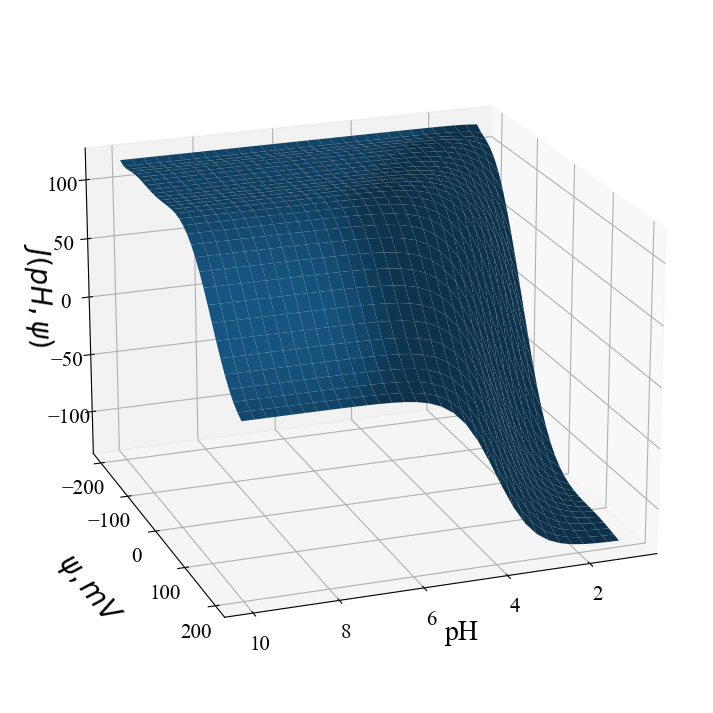

In [2]:
# @jit
def J_v(pH_L, psi):
    
    psi_start, psi_end = -300, 300
    pH_start, pH_end = 0, 9
    
    if (pH_L < pH_start):
        pH_L = pH_start
    elif (pH_L > pH_end):
        pH_L = pH_end
    
    if (psi < psi_start):
        psi = psi_start
    elif (psi > psi_end):
        psi = psi_end
    
    p_a = 3.3654e-24*psi**10+-1.72718633e-21*psi**9+-1.88006118e-19*psi**8+1.84428806e-16*psi**7+1.14875767e-15*psi**6+-7.86180209e-12*psi**5+8.73621142e-11*psi**4+1.38612359e-07*psi**3+4.02706504e-06*psi**2+-0.000921991562*psi**1+0.892742811*psi**0
    p_b = -0.01183303*psi**1+-1.74410965*psi**0
    p_c = 1.97927106e-17*psi**8+-8.11163955e-15*psi**7+-1.41331765e-12*psi**6+7.37414295e-10*psi**5+2.69242151e-08*psi**4+-1.47727446e-05*psi**3+-0.0018809272*psi**2+0.0294192901*psi**1+122.27226*psi**0
    p_d = 3.32575786e-13*psi**6+-3.43339599e-11*psi**5+-5.76545216e-08*psi**4+7.89631331e-06*psi**3+0.00138326473*psi**2+0.11950506*psi**1+1.50734239*psi**0
    
    
    J = np.tanh(p_a*pH_L + p_b)*p_c-p_d
    return J

x = np.outer(np.linspace(1, 10, 32), np.ones(32))
y = np.outer(np.linspace(-200, 200, 32), np.ones(32)).T
z = np.vectorize(J_v)(x, y)



 
# Creating figure
fig = plt.figure(figsize = (14, 9))
plt.rc('font', family='Times New Roman')
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, z)
ax.view_init(20, 70)
plt.xlabel(r'pH', fontsize = 20)

plt.ylabel(r'$\psi, mV$', fontsize = 20, labelpad=20)
plt.xticks(fontsize = 15)
y_ticks = np.arange(-200, 201, 100)
plt.yticks(y_ticks, fontsize=15)
font = {'size': 15}
ax.tick_params('z', labelsize=font['size'])
#make zlabel another font 'Times new roman'ArithmeticError
z_label = ax.set_zlabel(r'$J(pH, \psi)$', fontsize=20, rotation=60)
plt.savefig('Approx_vATPase.png')


# show plot
plt.show()

In [3]:
def NsXer_f(pH_L):
    return 10000/(1.1 * np.sqrt(2*np.pi))*np.exp(-(pH_L-6.2)**2/(2*1.21))
x = np.linspace(2, 10.4, 100)


In [4]:
init_R = 0.34                     	           #organelle radius [microns]
init_V = (4/3*3.1416*init_R**3*1e-12)/1000
init_S = 4*3.1416*init_R**2*1e-8
#{surface area [cm**2]}


# B = 0.08095428   # Donnan particles concentration [M]

CAX_Ca = 1       # Calcium stoichiometry of CAX
CAX_H = 3        # Proton stoichiometry of CAX 
CLC_Cl = 2       # Chloride stoichiometry of ClC-7
CLC_H = 1        # Proton stoichiometry of ClC-7
Ca_C = 1e-07      #[M]
Cl_C = 0.05      #[M]
Na_C = 0.015      #[M]
F = 96485      #[C] Na*e
K_C = 0.145      #[M]
NA = 6.02e+23    
NCX_Ca = 3       #[]
NCX_Na = 1       #[]
NHE_H = 1       #[]
NHE_Na = 1       #[]
N_CAX = 0       #[]
N_CLC = 50      #[]
N_NCX = 0       #[]
N_NHE = 0       #[]
N_VATP = 300 #!!      #[]


# N_VATP = 10      #[]
incr_coeff = 3.0
P_Ca = 0       #[ion*cm/s]
P_Cl = 1.2e-5       #[ion*cm/s]
P_H = 6e-05      #[ion*cm/s]
P_K = 7.1e-7      #[ion*cm/s]
P_Na = 9.6e-7      #[ion*cm/s]
# R = 0.34           #[mcm]
RTF = 25.69        #RT/F [mV]} ??????????????????????????????????????
# S = (1.45267584e-08)*(incr_coeff**2 )     #[cm^2]
ans = 0.25      #[]
beta_pH = 0.04      #[M/pH] Proton buffering capacity
cap = 1.45267584e-14      #[Farad] -  тут в оригинале -17, и в беркле тоже, это странно
cap_0 = 1e-06      #[F/cm^2] Bilayer capacitance 
init_Aeff = 0.3      
init_Ca_F = 0.0006      #[M]
init_Ca_T = 0.006      #[M]
init_Cl = 0.058      #[M]
init_pH = 5.8   
init_H = np.power(10, -init_pH)      #[M]
init_K = 0.05      #[M]
# init_K = 0.04
init_Na = 0.09      #[M]
# init_Na = 0.04

psi_in = 0       #[mV]
psi_out = -50  
B = init_K+init_Na+init_H-init_Cl - cap/F/init_V*(psi_in - psi_out)
# init_V = 1.64636595e-16      #[L]
# init_pH = 4.5     
  
init_psi_total = 0       #[mV]
p = 0       
pH_C = 7.2     
    #[mV] 
q = 2.2
r = 0.1      #Deactivation to activation ratio 
tau_act = 1       #[s]
tau_deact = 0.25      #[s]
N_NsXer = 1000      


Pw = 0.054e-2 #water permeability
Oc = 0.291
oh =  0.73
ok =  0.73
ona = 0.73
ocl = 0.73
Q = init_V*(Oc - (oh*10**(-init_pH) + ok*init_K + ona*init_Na + ocl*init_Cl))

In [5]:
# @jit
def derivatives(X, t):
    '''
    compute derivatives of X wrt time
    '''
    Aeff, NH, pH, NK, NNa, NCl, NCa_T, NCa_F, R = X
    
    V = (4/3*3.1416*abs(R)**3*1e-12)/1000
    S = 4*3.1416*abs(R)**2*1e-8


    #Luminal Concentrations
    H = NH/V/NA
    K = NK/V/NA
    Na = NNa/V/NA
    Cl = NCl/V/NA
    Ca_F = NCa_F/V/NA
    Ca_T = NCa_T/V/NA
    r = Ca_F/Ca_T
    
    #membrane potential
#     psi = (F/cap)*init_V*(H + K + Na - Cl + 2*Ca_T - B)
    psi = (F/cap)*(V*(H + K + Na - Cl + 2*Ca_T) - B*init_V)


#      Modified Cytoplasmic Surface Concentrations
    pH_C0   = (pH_C+psi_out/(RTF*2.3))
    K_C0    = K_C*exp(-psi_out/RTF)
    Na_C0   = Na_C*exp(-psi_out/RTF) 
    Cl_C0   = Cl_C*exp(psi_out/RTF) 
    Ca_F_C0 = Ca_C*exp(-2*psi_out/RTF) 
    
#     Modified Luminal Surface Concentrations
    pH_L0   = (pH+psi_in/(RTF*2.3))
    K_L0    = K*exp(-psi_in/RTF)
    Na_L0   = Na*exp(-psi_in/RTF) 
    Cl_L0   = Cl*exp(psi_in/RTF) 
    Ca_F_L0 = Ca_F*exp(-2*psi_in/RTF) 

    delta_pH    = pH_C0-pH_L0;  

#     Treatment of singular terms for passive ion flux
    if (abs(psi) > 300):
        psi = np.sign(psi)*300
    if (abs(psi) > 0.01):
        gg      =  psi / (1 - exp (- psi / RTF)) / RTF
        gg_Ca   = 2*psi/(1-exp(-2*psi/RTF))/RTF

    else: 
        gg      =  1 / 1 - (psi / RTF)/2 + (psi / RTF)**2/6 - (psi / RTF)**3 / 24 + (psi / RTF) ** 4 / 120
        gg_Ca   = 1/(1 - (psi/RTF) + (2/3)*(psi/RTF)**2 - (1/3)*(psi/RTF)**3 +(2/15)*(psi/RTF)**4)
        

    # vAPTase
    J_VATPASE  = N_VATP * J_v(pH, psi)


        # ClC-7 Antiporter {H out, Cl in}
    CLC_mu      = (CLC_H + CLC_Cl)*psi + RTF*(CLC_H*2.3*delta_pH + CLC_Cl*np.log(Cl_C0/Cl_L0))
    
    #     Switching function   
    x = 0.5 + 0.5*np.tanh((CLC_mu + 250)/75); 
    # Activity
    A = 0.3*x + 1.5E-5*(1-x)*CLC_mu**2;
    
    if (A < Aeff):
        tau = tau_deact
    else:
        tau = tau_act
    J_CLC    = N_CLC*Aeff*CLC_mu 
    
    
#      CAX Antiporter {H out, Ca in} [mV, ion/s]
    CAX_mu = (CAX_H - 2*CAX_Ca)*psi + RTF*(CAX_H*2.3*delta_pH + CAX_Ca/2*np.log(Ca_F_L0/Ca_F_C0))
    J_CAX = N_CAX*CAX_mu
    
    
    
    
#      Passive flux [ion/s]
    J_H = P_H*S*(10**(-pH_C0)*exp(-psi/RTF)-10**(-pH_L0))*gg*NA/1000
#     J_K = P_K*S*(K_C0*exp(-psi/RTF)-K_L0)*gg*NA/1000
#     J_Na = P_Na*S*(Na_C0*exp(-psi/RTF)-Na_L0)*gg*NA/1000

    J_K = P_K*S*((K_C0+Na_C0)*exp(-psi/RTF)-(K_L0+Na_L0))*gg*NA/1000
    J_Na = P_Na*S*((Na_C0+K_C0)*exp(-psi/RTF)-(K_L0+Na_L0))*gg*NA/1000
    J_Cl_unc = (P_Cl*S*(Cl_C0-Cl_L0*exp(-psi/RTF))*gg*NA/1000)*0.5
    J_Ca = P_Ca*S*(Ca_F_C0*exp(-2*psi/RTF)-Ca_F_L0)*gg_Ca*NA/1000
    
    

    
    #water flux
    J_w = Pw*S*(oh*10**(-pH) + ok*K + ona*Na + ocl*Cl + Q/V - Oc)
    
    
#     TRPML1 channel
    y = 0.5 - 0.5*np.tanh(psi + 40)
    P_trpml1 = p*(y*abs(psi) + (1-y)*(abs (psi + 40)**3)/(pH_L0**q))
    J_Ca_trpml1 = P_trpml1*S*(Ca_F_C0*exp(-2*psi/RTF)-Ca_F_L0)*gg_Ca*NA/1000


    
    dxdt = [(1/tau)*(A - Aeff),
        J_H + (J_VATPASE) - (CLC_H*J_CLC) - (CAX_H*J_CAX), 
           (-(J_H + (J_VATPASE) - (CLC_H*J_CLC) - (CAX_H*J_CAX))/V/NA)/beta_pH,
           J_K,
           J_Na,
           J_Cl_unc + (CLC_Cl*J_CLC),
           J_Ca + (CAX_Ca*J_CAX) + J_Ca_trpml1,
           (J_Ca + (CAX_Ca*J_CAX) + J_Ca_trpml1)*r, 
           J_w/(1000*55)/(4*np.pi*(R/1e5)**2)*1e5]

    return dxdt

In [6]:
init_NH = init_H*init_V*NA;      #[ions]
init_NK = init_K*init_V*NA;       
init_NNa = init_Na*init_V*NA;    
init_NCl = init_Cl*init_V*NA;     
init_NCa_T = init_Ca_T*init_V*NA; 
init_NCa_F = init_Ca_F*init_V*NA; 

X0 = [init_Aeff, init_NH, init_pH, init_NK, init_NNa, init_NCl, init_NCa_T, init_NCa_F, init_R]

In [7]:
tspan = np.arange(0, 1200, 1e-2)
solution = odeint(derivatives, X0, tspan)

In [8]:
tspan_stat = np.arange(0, 20000, 1e-2)
solution_stat = odeint(derivatives, X0, tspan_stat)

In [9]:
def V_arr_def(solution):
    V_arr = (4/3*3.1416*solution[:, 8]**3*1e-12)/1000
    return V_arr

def Psi_arr_def(solution, V_arr):
    psi_arr = (F/cap)*(V_arr*(solution[:, 1]/V_arr/NA + solution[:, 3]/V_arr/NA + solution[:, 4]/V_arr/NA - solution[:, 5]/V_arr/NA + 2*solution[:, 6]/V_arr/NA) - B*init_V)
    return psi_arr
    
def J_w_arr_def(solution, V_arr):
    J_w_arr = Pw*4*3.1416*abs(solution[:, 8])**2*1e-8*(oh*10**(-solution[:, 2]) + ok*solution[:, 3]/V_arr/NA + ona*solution[:, 4]/V_arr/NA + ocl*solution[:, 5]/V_arr/NA + Q/V_arr - Oc)
    return J_w_arr

In [10]:
V_arr = V_arr_def(solution)
psi_arr = Psi_arr_def(solution, V_arr)
J_w_arr = J_w_arr_def(solution, V_arr)

V_arr_stat = V_arr_def(solution_stat)
psi_arr_stat = Psi_arr_def(solution_stat, V_arr_stat)
J_w_arr_stat = J_w_arr_def(solution_stat, V_arr_stat)


In [11]:
def set_plot_font_params():
    """
    Set the font parameters for all plots in the Matplotlib instance.
    """
    # Set the font family and style
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Times new roman']
    plt.rcParams['font.style'] = 'normal'

    # Set the font sizes
    plt.rcParams['axes.labelsize'] = 30
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 20

72.24510323232914 37.114007956162816 74.18789794508811


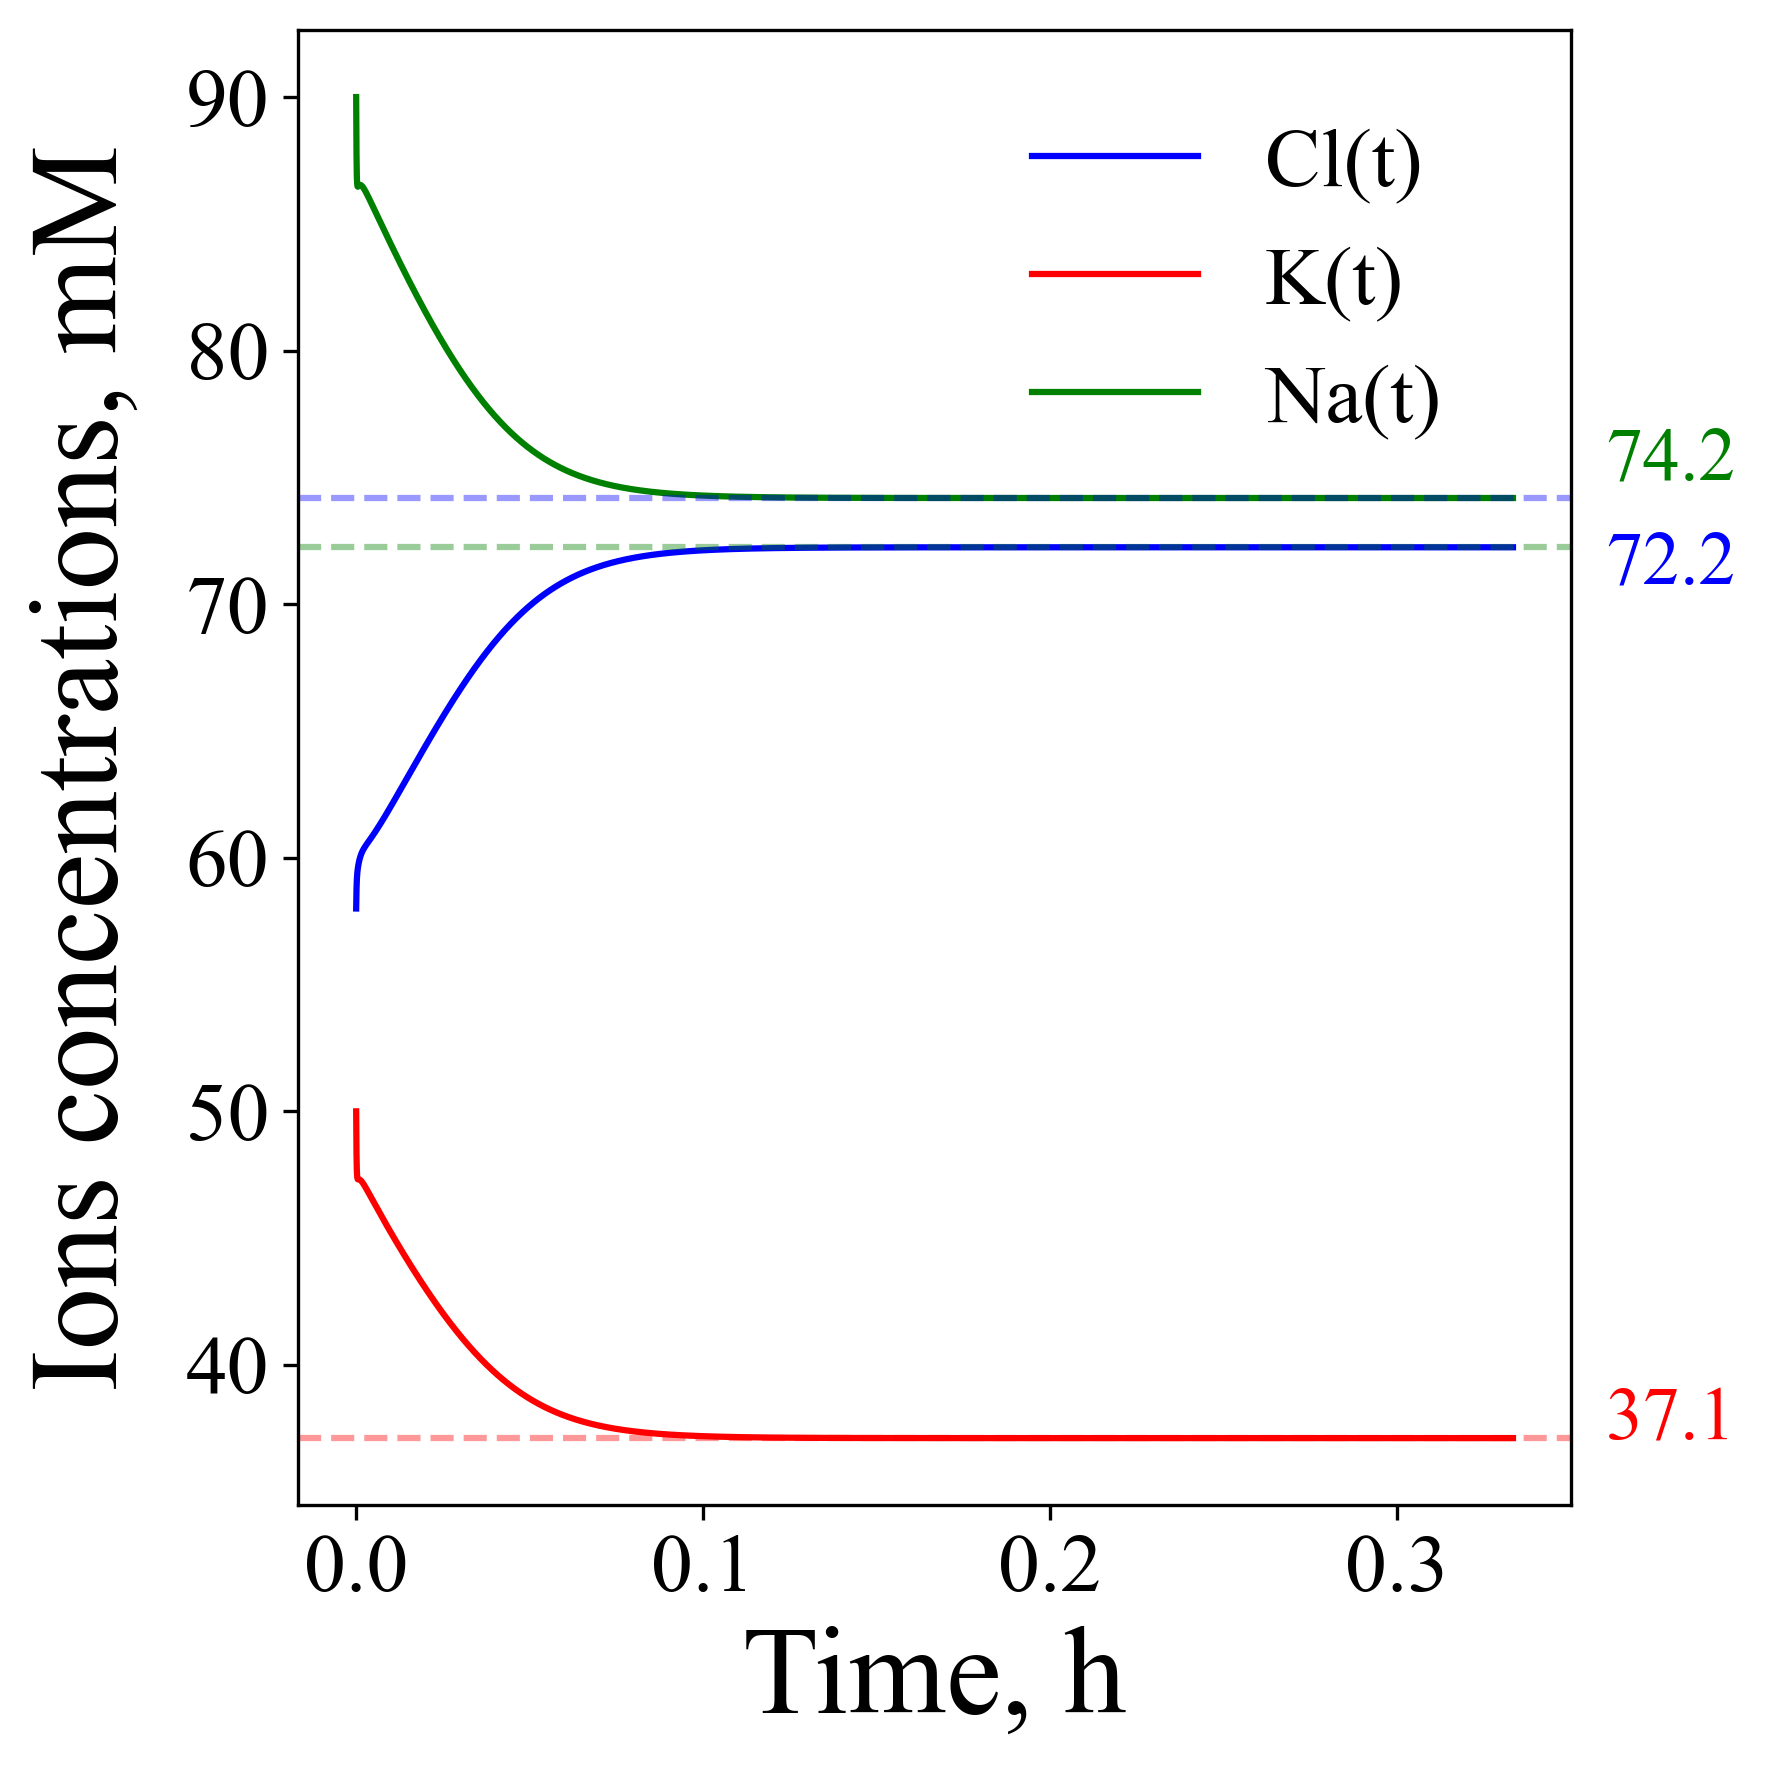

In [12]:
def plot_solution_concentrations(t, solution, solution_stat, V_arr, V_arr_stat):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)


    cl_conc = solution[:, 5] / V_arr / NA*1e3
    k_conc = solution[:, 3] / V_arr / NA*1e3
    na_conc = solution[:, 4] / V_arr / NA*1e3

    cl_stat = solution_stat[:, 5][-1] / V_arr_stat[-1] / NA*1e3
    k_stat = solution_stat[:, 3][-1] / V_arr_stat[-1] / NA*1e3
    na_stat = solution_stat[:, 4][-1] / V_arr_stat[-1] / NA*1e3


    print(cl_stat, k_stat, na_stat)


    t = t/3600
    # Plot the concentrations
    ax.plot(t, cl_conc, 'b', label='Cl(t)')
    ax.plot(t, k_conc, 'r', label='K(t)')
    ax.plot(t, na_conc, 'g', label='Na(t)')

    ax.legend(loc=[0.55, 0.7], fontsize=20, frameon=False)
    ax.set_ylabel('Ions concentrations, mM', fontsize=30, labelpad=10)
    ax.set_xlabel('Time, h', fontsize=30)
    ax.tick_params(axis='both', labelsize=20)
#     ax.set_adjustable('box')
    # plt.xlim(0, 3.5)
    # Extend the horizontal lines beyond the plot area
    ax.axhline(cl_stat, 0, 1, color = 'g', clip_on=False, linestyle='dashed', alpha = 0.4)
    ax.axhline(k_stat, 0, 1, color = 'r', clip_on=False, linestyle='dashed', alpha = 0.4)
    ax.axhline(na_stat, 0, 1, color = 'b', clip_on=False, linestyle='dashed', alpha = 0.4)



    ax.text(x=0.36, y=cl_stat*0.98, s=round(cl_stat, 1), fontsize=18, color='b')
    ax.text(x=0.36, y=k_stat*1, s=round(k_stat, 1), fontsize=18, color='r')
    ax.text(x=0.36, y=na_stat*1.01, s=round(na_stat, 1), fontsize=18, color='g')

    plt.tight_layout()
    plt.savefig('all_figs/1LM_conc_d.png')
    plt.show()

plot_solution_concentrations(tspan, solution, solution_stat=solution_stat, V_arr=V_arr, V_arr_stat=V_arr_stat)


In [13]:
tspan_stat = np.arange(0, 20000, 1e-2)
solution_stat = odeint(derivatives, X0, tspan_stat)

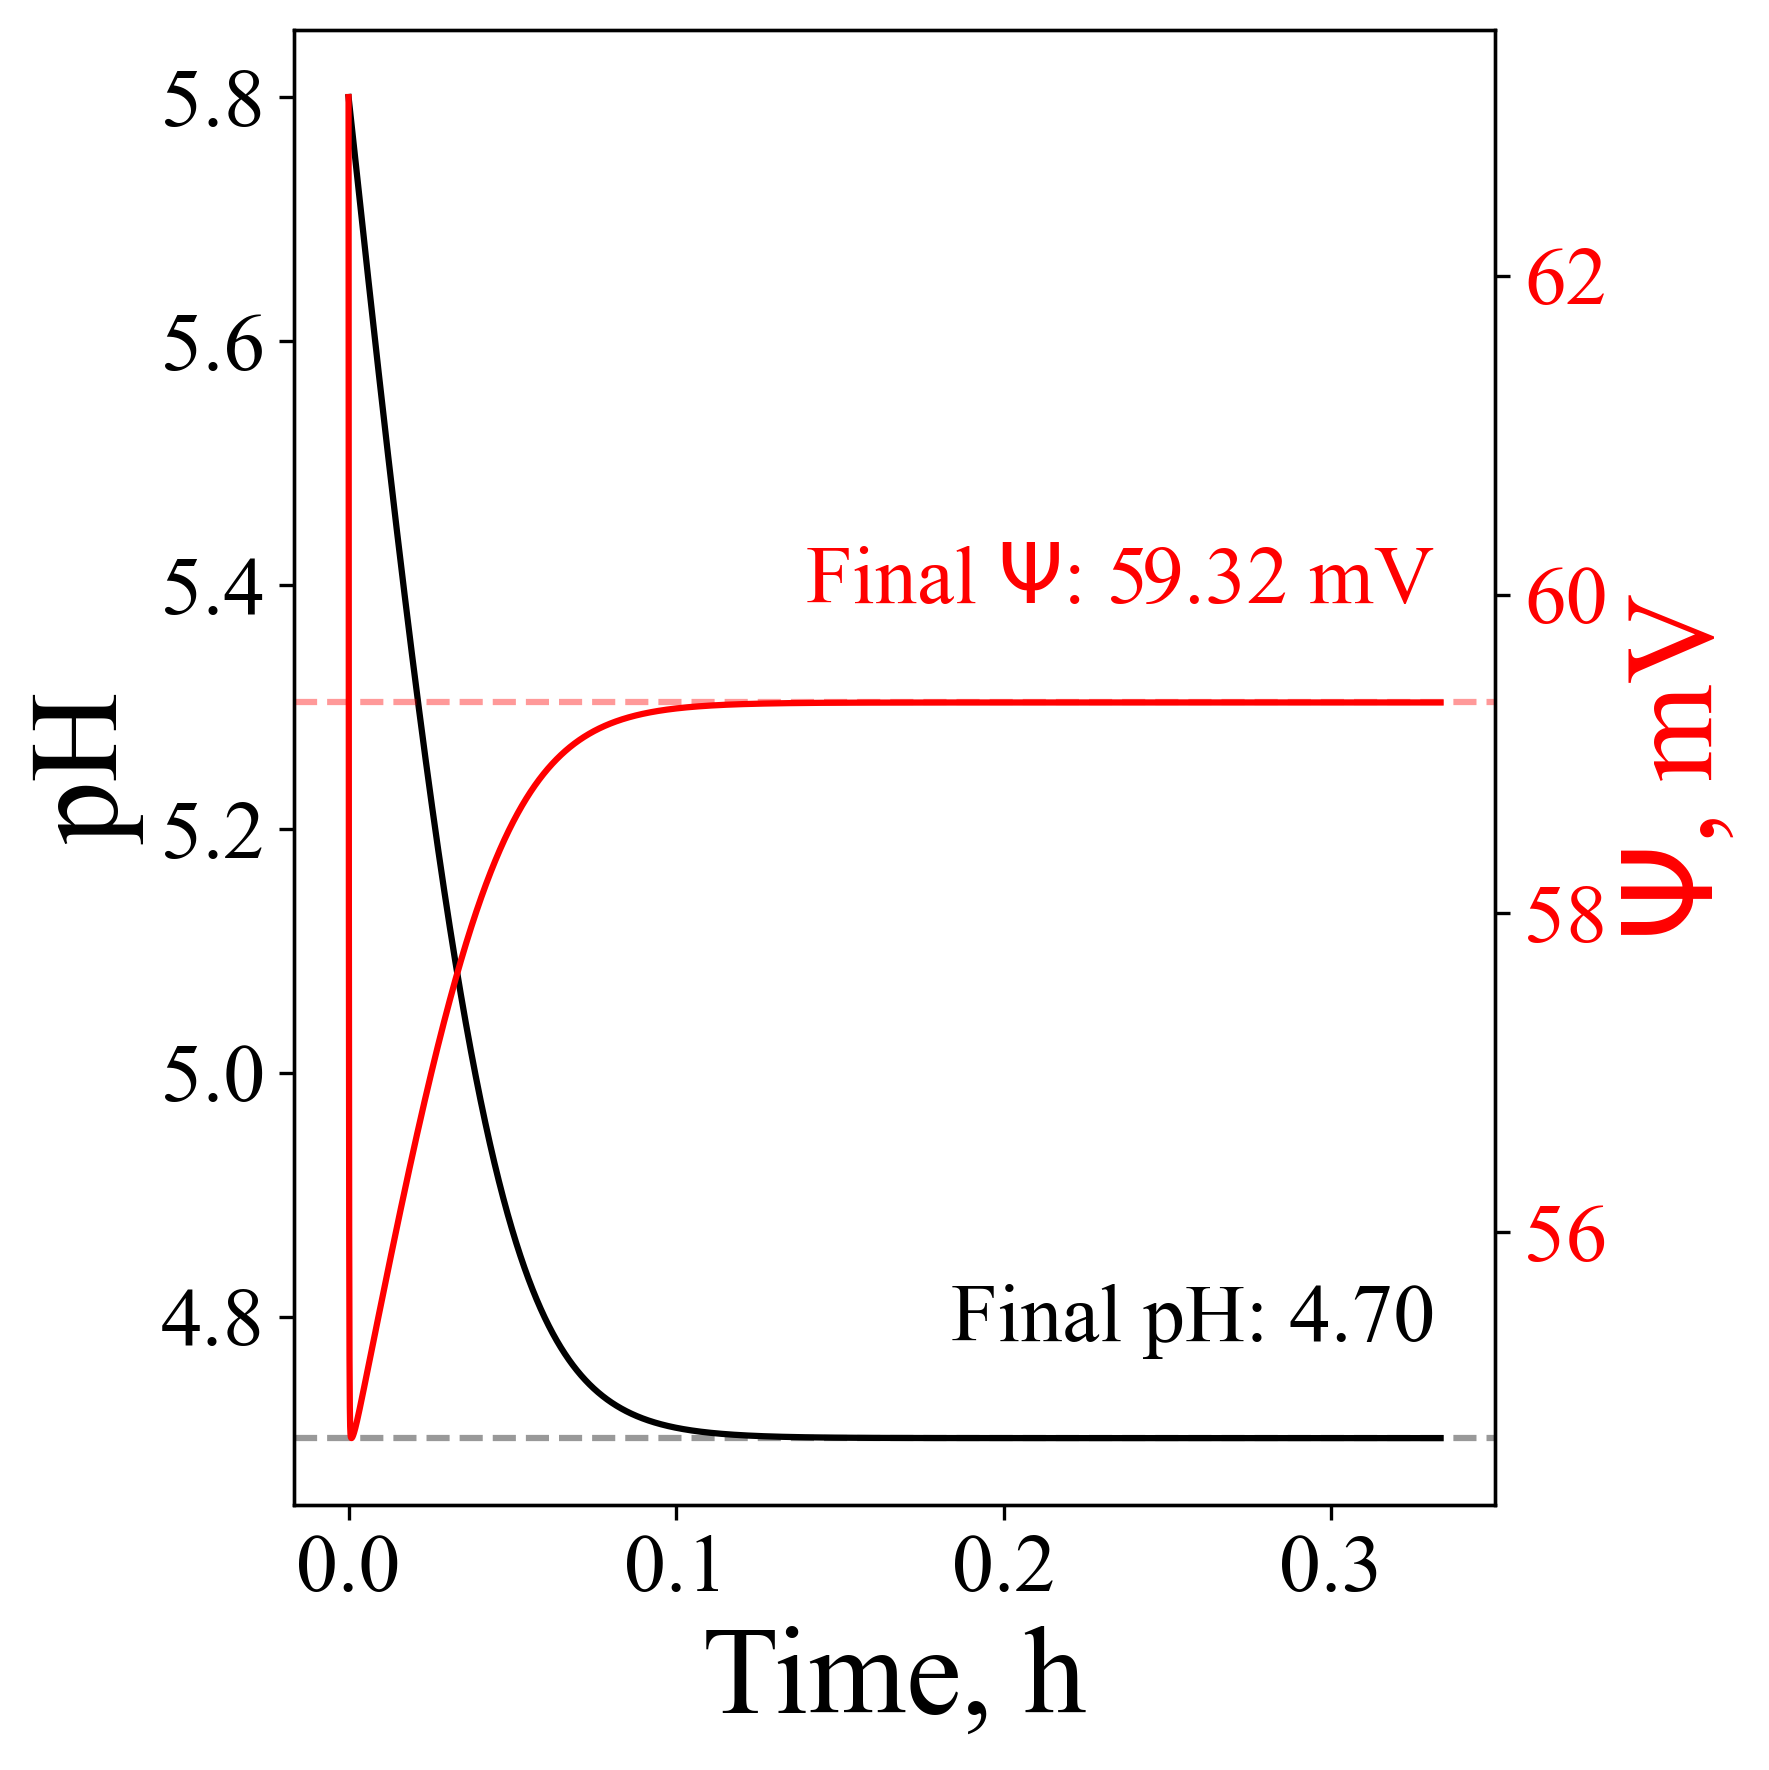

In [14]:
set_plot_font_params()

def plot_solution_pH_psi(t, solution, solution_stat, psi_arr, psi_stat):
    fig, ax1 = plt.subplots(figsize=(6, 6), dpi=300)

    t = t/3600

    # Plot R(t)
    ax1.plot(t, solution[:, 2], 'black', label='pH$(t)$')
    ax1.set_ylabel(r'pH', fontsize=30, color='black')
    ax1.tick_params(axis='y', colors='black', labelsize = 20)
    ax1.axhline(solution_stat[:, 2][-1], 0, 1, color = 'black', clip_on=False, linestyle='dashed', alpha = 0.4)
    ax1.text(0.95, 0.15, 'Final pH: {:.2f}'.format(solution_stat[:, 2][-1]), transform=ax1.transAxes, ha='right', va='top', fontsize=20, color='black')

    # Create a second y-axis for J_w_arr
    ax2 = ax1.twinx()

    # Plot J_w_arr
    psi_arr = (F/cap)*init_V*(solution[:, 1]/init_V/NA + solution[:, 3]/init_V/NA + solution[:, 4]/init_V/NA - solution[:, 5]/init_V/NA + 2*solution[:, 6]/init_V/NA - B)

    ax2.plot(t, psi_arr, 'r', label=r'$\Psi$(t)', alpha=1)  # Set transparency with alpha
    ax2.set_ylabel(r'$\Psi$, mV', fontsize=30, color='r')
    ax2.tick_params(axis='y', colors='black', labelcolor='red')
    ax2.tick_params(axis='both', labelsize=20)
    ax2.axhline(psi_stat, 0, 1, color = 'r', clip_on=False, linestyle='dashed', alpha = 0.4)
    ax2.text(0.95, 0.65, 'Final $\Psi$: {:.2f} mV'.format(psi_stat), transform=ax2.transAxes, ha='right', va='top', fontsize=20, color='r')

    # ax1.set_xlim(0, 0.35)
    

    # Set the x-axis label and tick color
    ax1.set_xlabel('Time, h', fontsize=30)
    ax1.tick_params(axis='x', colors='k')  # Set x-tick color to black

    plt.tight_layout()
    plt.savefig('all_figs/1LM_pH_d.png')
    plt.show()

    

plot_solution_pH_psi(tspan, solution, solution_stat, psi_arr, psi_arr_stat[-1])


In [15]:
def V_arr_def(solution):
    V_arr = (4/3*3.1416*solution[:, 8]**3*1e-12)/1000
    return V_arr

def Psi_arr_def(solution, V_arr):
    psi_arr = (F/cap)*(V_arr*(solution[:, 1]/V_arr/NA + solution[:, 3]/V_arr/NA + solution[:, 4]/V_arr/NA - solution[:, 5]/V_arr/NA + 2*solution[:, 6]/V_arr/NA) - B*init_V)
    return psi_arr
    
def J_w_arr_def(solution, V_arr):
    J_w_arr = Pw*4*3.1416*abs(solution[:, 8])**2*1e-8*(oh*10**(-solution[:, 2]) + ok*solution[:, 3]/V_arr/NA + ona*solution[:, 4]/V_arr/NA + ocl*solution[:, 5]/V_arr/NA + Q/V_arr - Oc)
    return J_w_arr
V_arr = V_arr_def(solution)
psi_arr = Psi_arr_def(solution, V_arr)
J_w_arr = J_w_arr_def(solution, V_arr)

V_arr_stat = V_arr_def(solution_stat)
psi_arr_stat = Psi_arr_def(solution_stat, V_arr_stat)
J_w_arr_stat = J_w_arr_def(solution_stat, V_arr_stat)


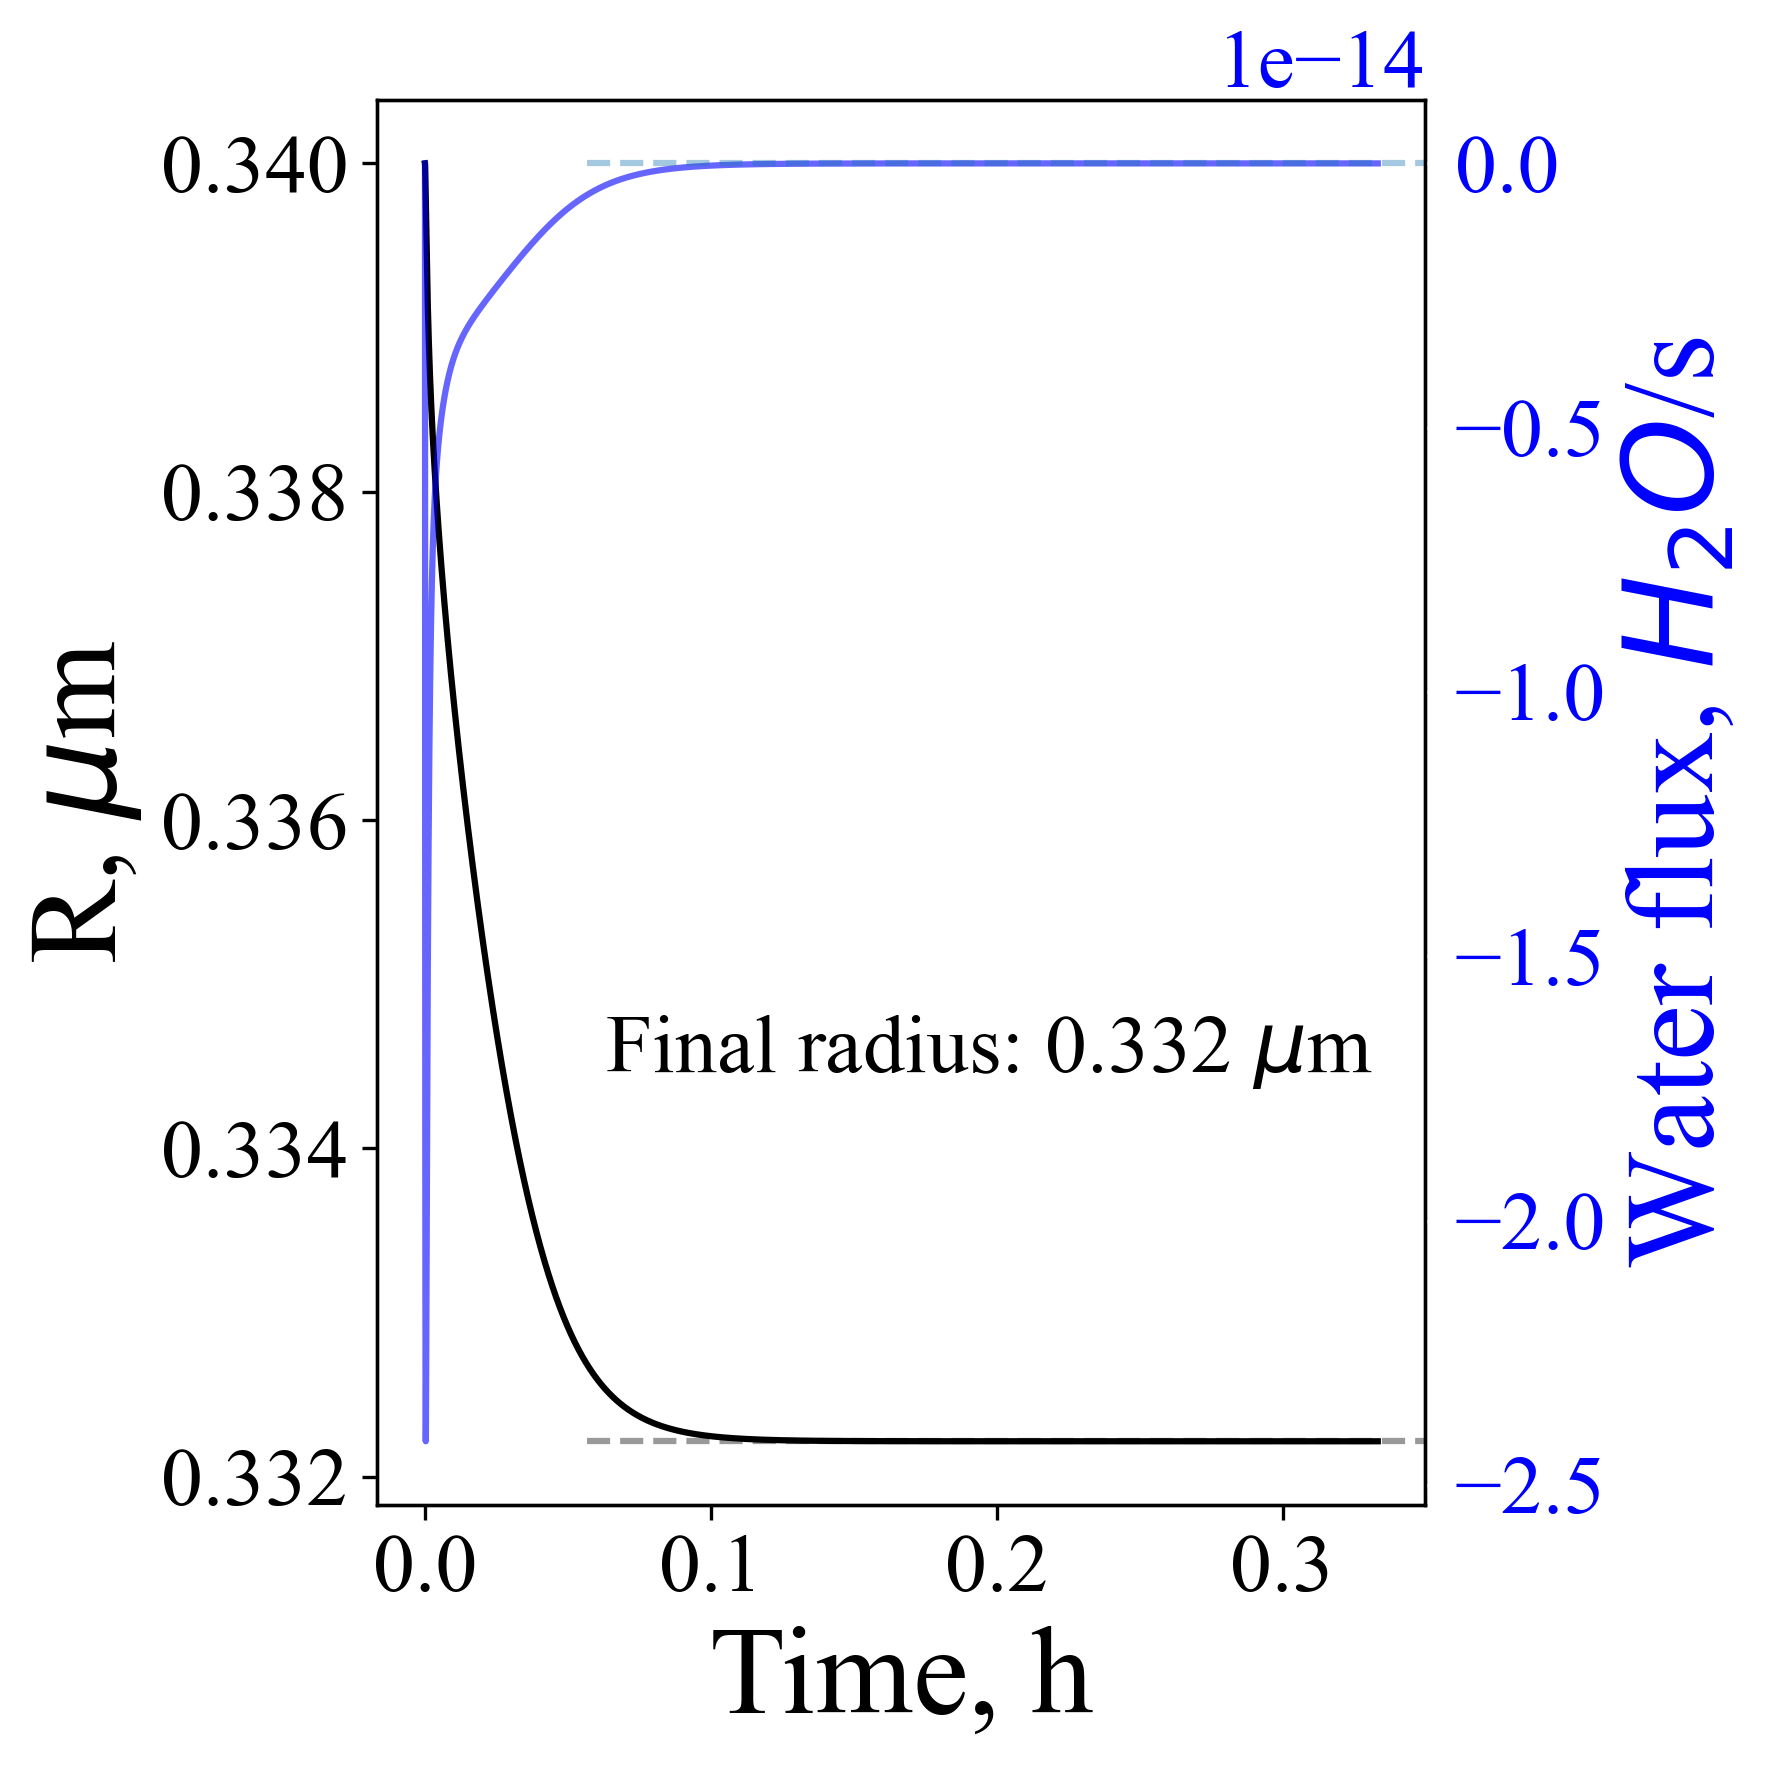

In [16]:
set_plot_font_params()



def plot_solution_R(t, solution, solution_stat, V_arr, V_arr_stat, J_w_arr, J_w_arr_stat):
    
    J_w_arr_stat = J_w_arr_stat[-1]
    fig, ax1 = plt.subplots(figsize=(6, 6), dpi=300)
    t = t/3600

    # Plot R(t)
    ax1.plot(t, solution[:, 8], 'black', label='R(t)')
    ax1.set_ylabel(r'R, $\mu$m', fontsize=30, color='black')
    ax1.tick_params(axis='y', colors='black')

    ax1.axhline(solution_stat[:, 8][-1], 0.2, 1, color = 'black', clip_on=False, linestyle='dashed', alpha = 0.4)
    

    ax1.text(0.95, 0.35, 'Final radius: {:.3f} $\mu$m'.format(solution_stat[:, 8][-1]), transform=ax1.transAxes, ha='right', va='top', fontsize=20, color='black')


    # Create a second y-axis for J_w_arr
    ax2 = ax1.twinx()

    # Plot J_w_arr
    J_w_arr = J_w_arr
    ax2.plot(t, J_w_arr, 'b', label='J_w_arr', alpha=0.6)  # Set transparency with alpha
    ax2.set_ylabel(r'Water flux, $H_2O$/s', fontsize=30, color='b')
    ax2.tick_params(axis='y', colors='white', labelcolor='b')
    ax2.axhline(0, 0.2, 1, linestyle = 'dashed', alpha = 0.4)
    

    # Set the x-axis label and tick color
    ax1.set_xlabel('Time, h', fontsize=30)
    ax1.tick_params(axis='x', colors='k')  # Set x-tick color to black
    ax1.tick_params(axis='both', labelsize=20)
    ax2.tick_params(axis='both', labelsize=20)
    plt.tight_layout()
    plt.savefig('all_figs/1LM_R_d.png')
    plt.show()

    

plot_solution_R(tspan, solution, solution_stat, V_arr, V_arr_stat, J_w_arr, J_w_arr_stat)



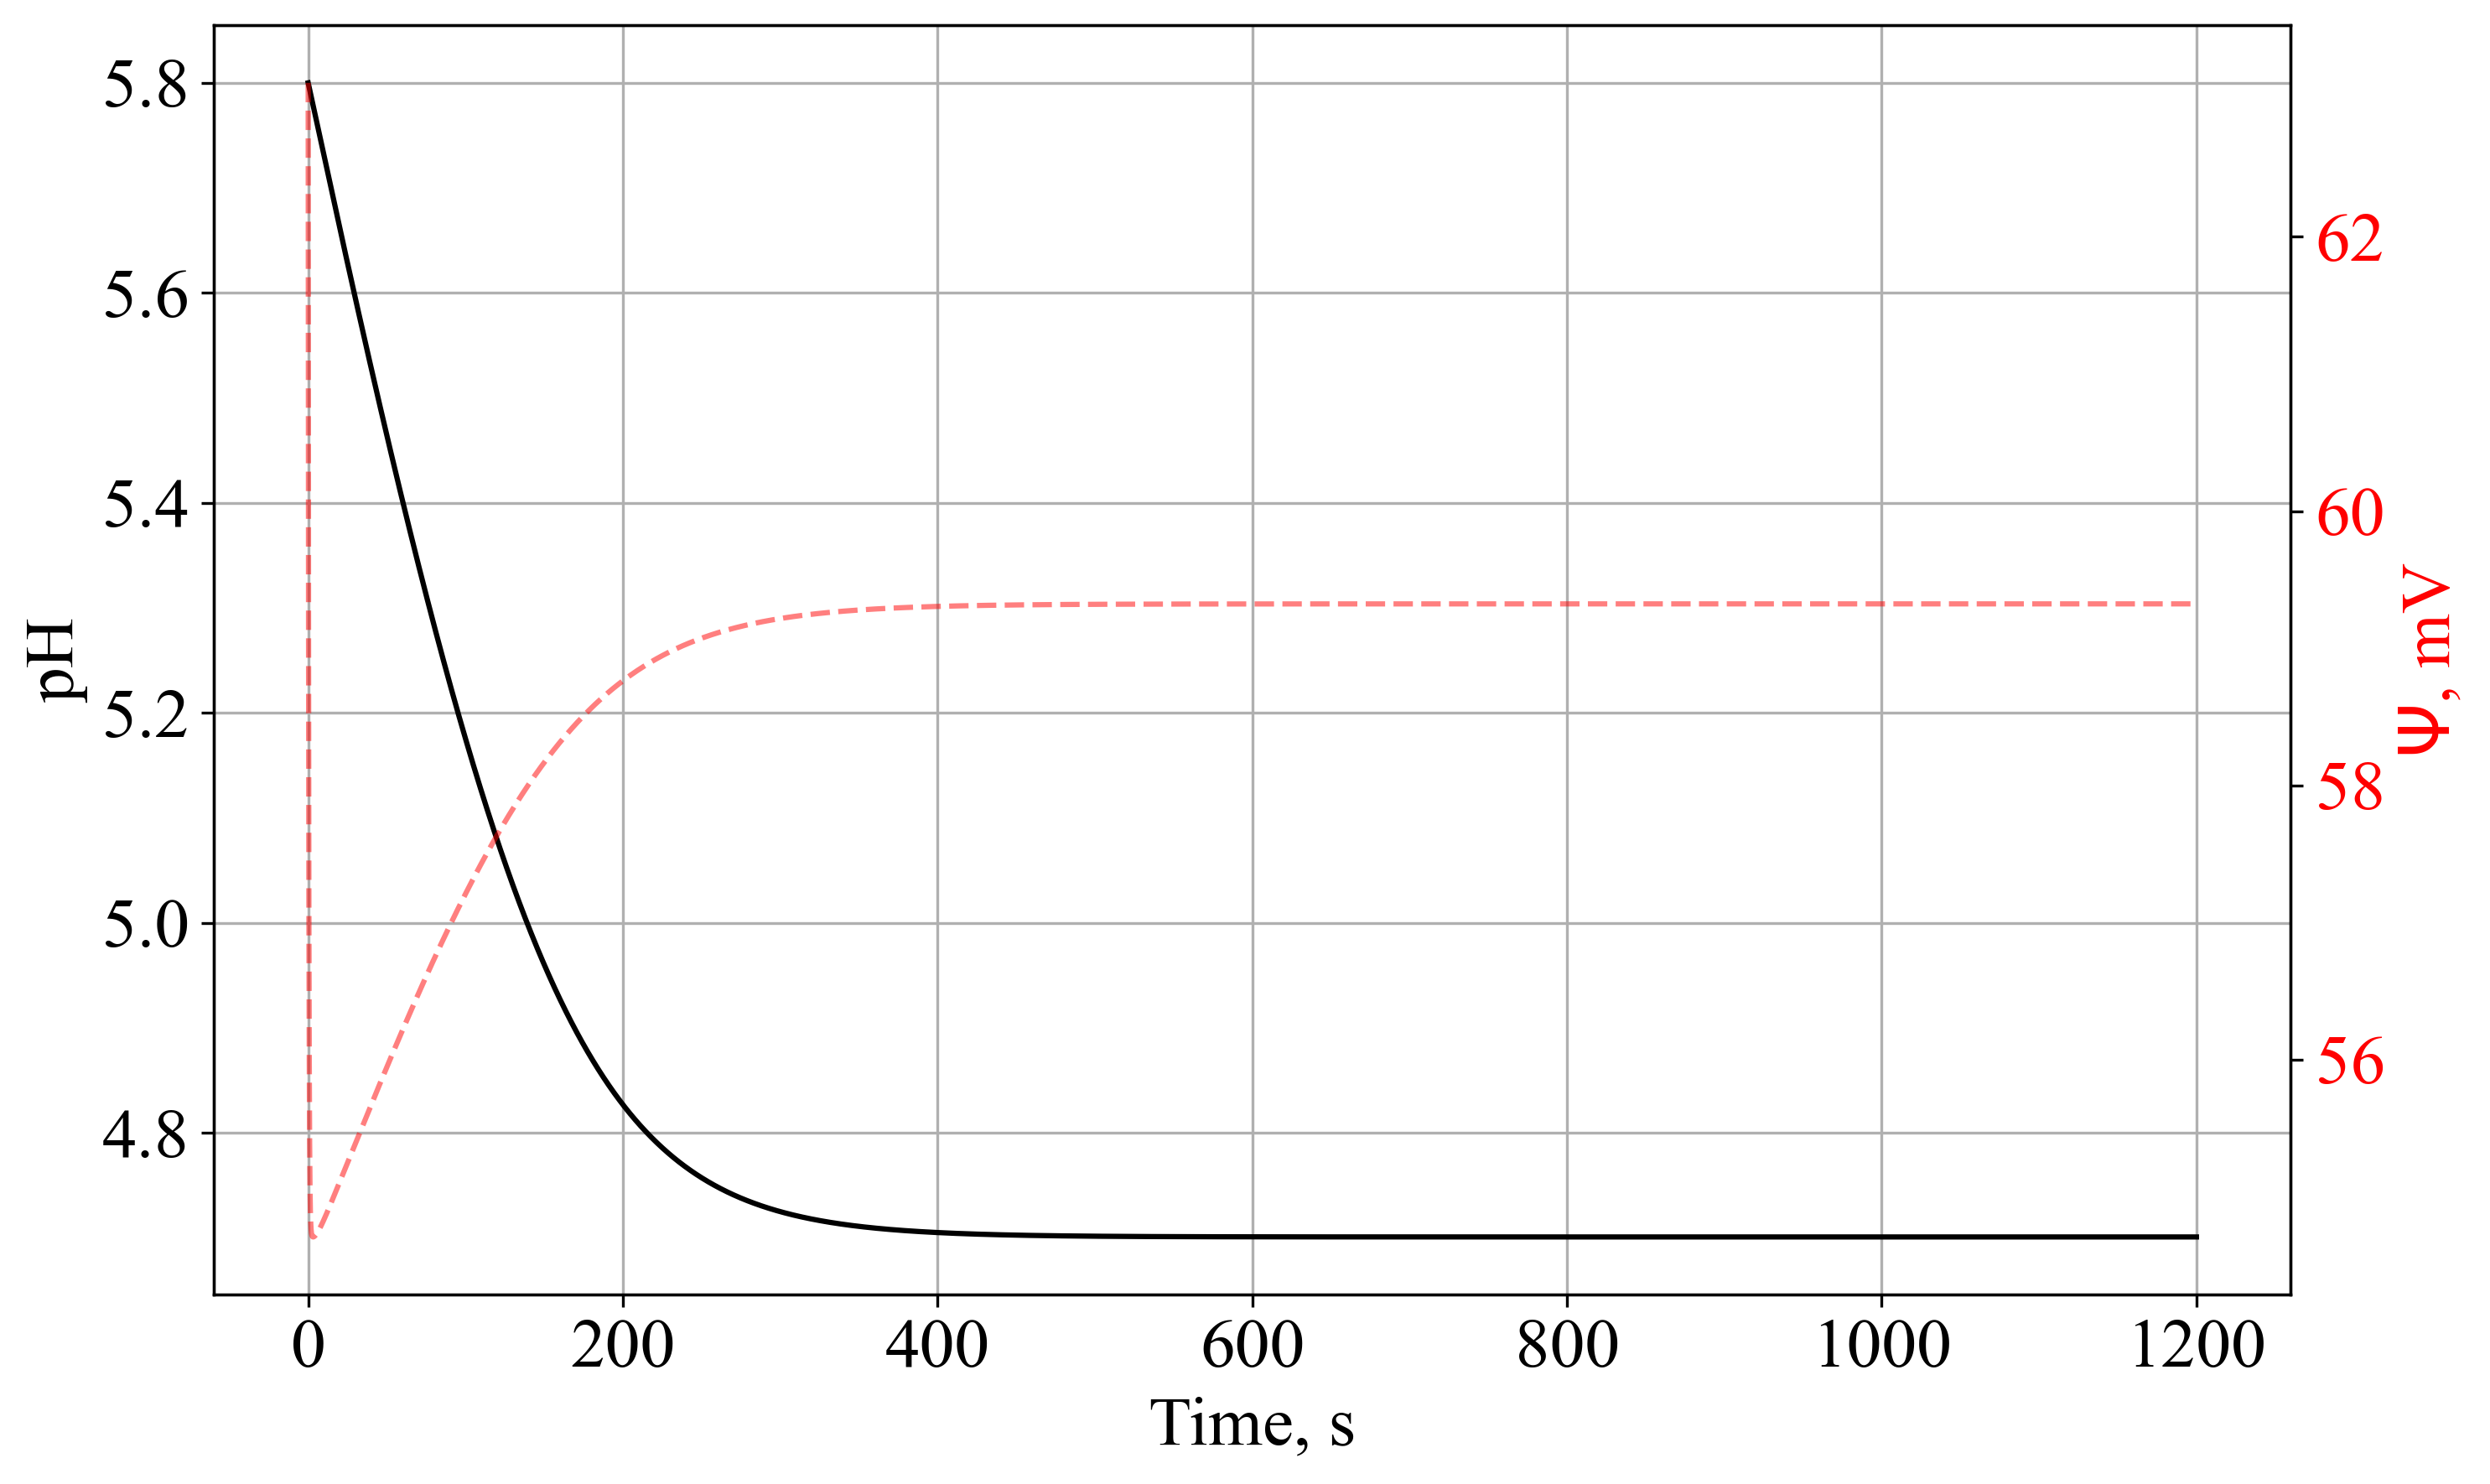

In [17]:
set_plot_font_params()

def plot_solution_pH_psi(t, solution, V_arr):
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

    # Plot R(t)
    ax1.plot(t, solution[:, 2], 'black', label='pH$(t)$')
    ax1.set_ylabel(r'pH', fontsize=20, color='black')
    ax1.tick_params(axis='y', colors='black')
    ax1.grid()

    # Create a second y-axis for J_w_arr
    ax2 = ax1.twinx()

    # Plot J_w_arr
    psi_arr = (F/cap)*init_V*(solution[:, 1]/init_V/NA + solution[:, 3]/init_V/NA + solution[:, 4]/init_V/NA - solution[:, 5]/init_V/NA + 2*solution[:, 6]/init_V/NA - B)

    ax2.plot(t, psi_arr, 'r--', label=r'$\Psi$(t)', alpha=0.5)  # Set transparency with alpha
    ax2.set_ylabel(r'$\Psi$, mV', fontsize=20, color='r')
    ax2.tick_params(axis='y', colors='black', labelcolor='red')

    # Set the x-axis label and tick color
    ax1.set_xlabel('Time, s', fontsize=20)
    ax1.tick_params(axis='x', colors='k')  # Set x-tick color to black

    plt.tight_layout()
    plt.show()



plot_solution_pH_psi(tspan, solution, V_arr)


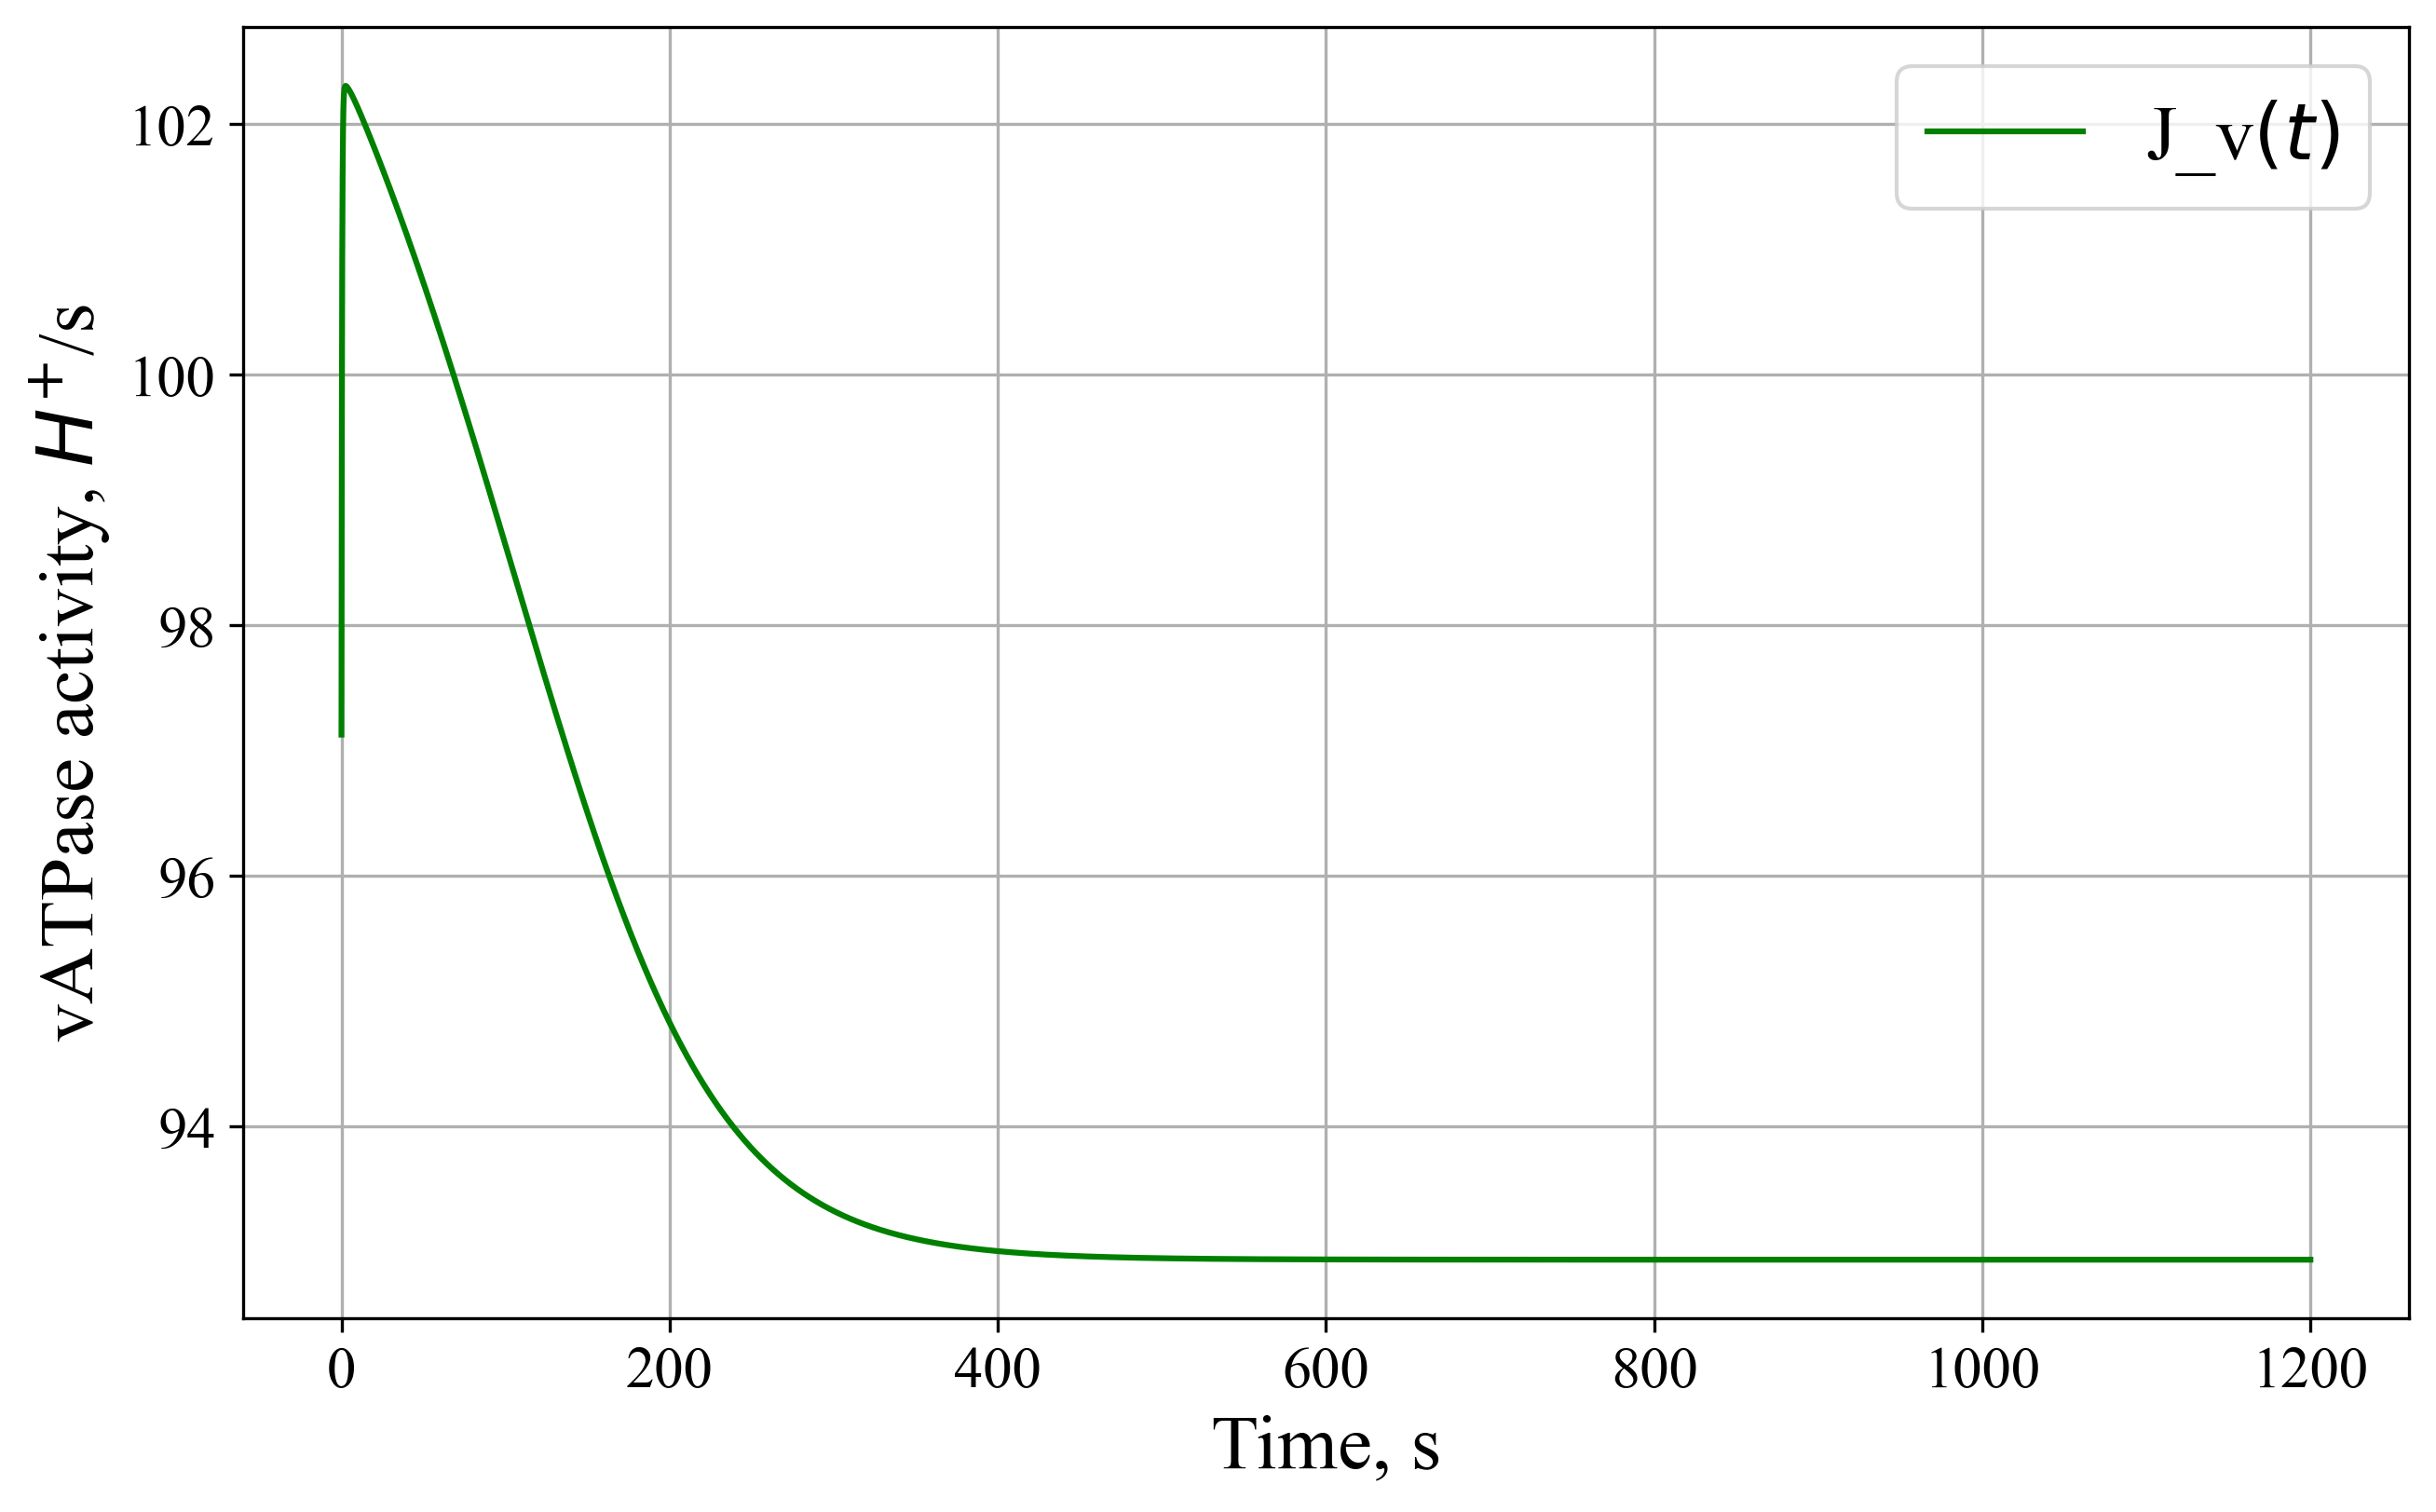

In [18]:
def plot_vATPase_work(t, solution):
    plt.figure(figsize=(10,6), dpi=300)
    v_arr = np.vectorize(J_v)(solution[:, 2], psi_arr)
    plt.plot(t, v_arr, 'g', label='J_v$(t)$')
    plt.legend(loc='best')
    plt.ylabel(r'vATPase activity, $H^{+}$/s', fontsize=20)
    plt.xlabel('Time, s', fontsize=20)
    plt.grid()
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

plot_vATPase_work(tspan, solution)